In [1]:
#Imorting all libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
import statistics

In [2]:
#read and shuffle data
df = pd.read_csv("/content/Dataset-5 (1).csv")
df = df.sample(frac = 1)

In [3]:
df.columns

Index(['Unnamed: 0', 'New_ID', 'Leukocytes_(10^9/L)', 'Platelets_(10^9/L)',
       'Monocytes_count_(10^9/L)', 'Eosinophils_count_(10^9/L)', 'CoV-2'],
      dtype='object')

In [4]:
df

,Unnamed: 0,New_ID,Leukocytes_(10^9/L),Platelets_(10^9/L),Monocytes_count_(10^9/L),Eosinophils_count_(10^9/L),CoV-2
106,106,Italia_0120,-0.253188,-0.277687,-0.780688,-0.464502,1
951,951,Italia_1031,-0.048258,0.109724,-0.410897,3.004931,0
123,123,Italia_0139,-1.105267,-0.612029,-0.410897,-0.464502,1
432,432,Italia_0473,-0.479690,0.311391,-0.410897,-0.464502,1
1127,1127,Italia_1219,1.871615,1.394021,0.143789,-0.464502,0
...,...,...,...,...,...,...,...
868,868,Italia_0939,-0.609120,1.712441,0.328684,-0.464502,1
206,206,Italia_0229,0.739106,-0.410363,-0.780688,-0.464502,1
1369,1369,Italia_1494,2.141260,-1.036590,3.471905,-0.464502,0
576,576,Italia_0630,2.443263,0.210558,NaN,NaN,0


In [5]:
df['CoV-2'].value_counts()

1    788
0    744
Name: CoV-2, dtype: int64

In [6]:
df.shape

(1532, 7)

In [7]:
#dropping id column as it is not a valid attribute to train model
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.drop(['New_ID'], axis = 1)

In [8]:
df

,Leukocytes_(10^9/L),Platelets_(10^9/L),Monocytes_count_(10^9/L),Eosinophils_count_(10^9/L),CoV-2
106,-0.253188,-0.277687,-0.780688,-0.464502,1
951,-0.048258,0.109724,-0.410897,3.004931,0
123,-1.105267,-0.612029,-0.410897,-0.464502,1
432,-0.479690,0.311391,-0.410897,-0.464502,1
1127,1.871615,1.394021,0.143789,-0.464502,0
...,...,...,...,...,...
868,-0.609120,1.712441,0.328684,-0.464502,1
206,0.739106,-0.410363,-0.780688,-0.464502,1
1369,2.141260,-1.036590,3.471905,-0.464502,0
576,2.443263,0.210558,NaN,NaN,0


In [9]:
df.isnull().any()

Leukocytes_(10^9/L)           False
Platelets_(10^9/L)            False
Monocytes_count_(10^9/L)       True
Eosinophils_count_(10^9/L)     True
CoV-2                         False
dtype: bool

In [10]:
#df = df.fillna(lambda x: x.median())

In [11]:
data = df.to_numpy()

data.shape

(1532, 5)

In [12]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(data)
#X_2 = X
SimpleImputer()
data = imp.transform(data)

data

array([[-0.25318827, -0.27768741, -0.7806882 , -0.46450233,  1.        ],
       [-0.04825799,  0.10972433, -0.41089745,  3.00493149,  0.        ],
       [-1.10526681, -0.61202905, -0.41089745, -0.46450233,  1.        ],
       ...,
       [ 2.14126029, -1.03658986,  3.47190541, -0.46450233,  0.        ],
       [ 2.44326281,  0.21055753, -0.22600208, -0.46450233,  0.        ],
       [-0.50126177, -0.2723804 , -0.22600208,  0.9232712 ,  0.        ]])

In [13]:
#splitting into 7 folds
data_g = np.array_split(data, 7)

## **LOGISTIC REGRESSION**

0.7591812668463612
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.75      0.57      0.65       112
Covid Positive       0.64      0.80      0.71       106

      accuracy                           0.68       218
     macro avg       0.70      0.69      0.68       218
  weighted avg       0.70      0.68      0.68       218

------------------TRAINING-----------------
                precision    recall  f1-score   support

Covid Negative       0.69      0.53      0.60       632
Covid Positive       0.64      0.78      0.70       682

      accuracy                           0.66      1314
     macro avg       0.67      0.65      0.65      1314
  weighted avg       0.66      0.66      0.65      1314



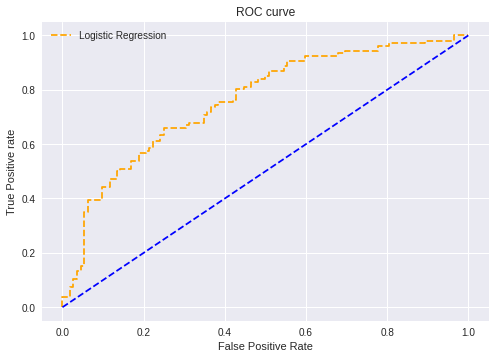

In [14]:
accuracy_log_test = []
accuracy_log_train = []
classif_log_test=[]
classif_log_train=[]

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:4])
                train_data_y.append(data_g[j][w][4])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:4])
                test_data_y.append(data_g[j][w][4])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn 
    clf = LogisticRegression(random_state = 0)
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr1, tpr1, thresh1 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    #calculating and appending accuracies
    acc1_log = accuracy_score(test_data_yn, test_pred_y_log)
    accuracy_log_test.append(acc1_log)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))
    print("------------------TRAINING-----------------")
    acc2_log = accuracy_score(train_data_yn, train_pred_y_log)
    accuracy_log_train.append(acc2_log)
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(train_data_yn, train_pred_y_log, target_names=target_names))


In [15]:
#Creating the Confusion matrix
cm= confusion_matrix(test_data_yn, test_pred_y_log)
cm

array([[64, 48],
       [21, 85]])

In [16]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_log_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_log_train))


Mean accuracy for test set =  0.6834862385321101
Mean accuracy for train set =  0.6590563165905632


# **NAIVE BAYES**

0.7215296495956873
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.82      0.44      0.57       112
Covid Positive       0.60      0.90      0.72       106

      accuracy                           0.66       218
     macro avg       0.71      0.67      0.64       218
  weighted avg       0.71      0.66      0.64       218



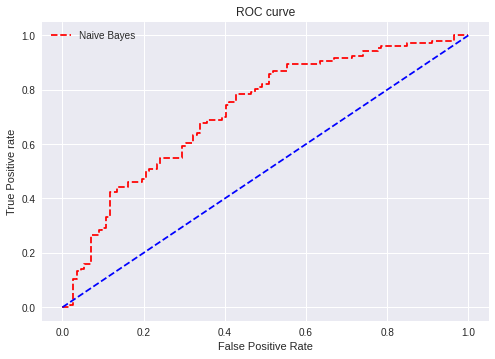

In [17]:
accuracy_nb_test = []
accuracy_nb_train = []

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:4])
                train_data_y.append(data_g[j][w][4])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:4])
                test_data_y.append(data_g[j][w][4])
       
    #convert into array         
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = GaussianNB()
    clf.fit(train_data_xn, train_data_yn)

    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr2, tpr2, thresh2 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_nb = clf.predict(test_data_xn)
    train_pred_y_nb = clf.predict(train_data_xn)

    #calculating and appending accuracies
    acc1_nb = accuracy_score(test_data_yn, test_pred_y_nb)
    accuracy_nb_test.append(acc1_nb)
    
    acc2_nb = accuracy_score(train_data_yn, train_pred_y_nb)
    accuracy_nb_train.append(acc2_nb)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))

In [18]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_nb_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_nb_train))

Mean accuracy for test set =  0.6605504587155964
Mean accuracy for train set =  0.6156773211567732


# ***Fisher Linear Discriminant***

0.7505896226415095
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.74      0.51      0.60       112
Covid Positive       0.61      0.81      0.70       106

      accuracy                           0.66       218
     macro avg       0.68      0.66      0.65       218
  weighted avg       0.68      0.66      0.65       218



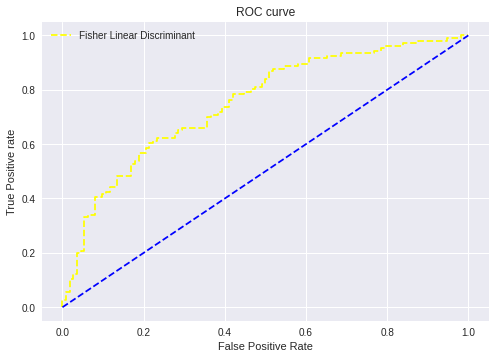

In [19]:
accuracy_fl_test = []
accuracy_fl_train = []

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:4])
                train_data_y.append(data_g[j][w][4])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:4])
                test_data_y.append(data_g[j][w][4])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = LinearDiscriminantAnalysis()
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr3, tpr3, thresh3 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_fl = clf.predict(test_data_xn)
    train_pred_y_fl = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_fl = accuracy_score(test_data_yn, test_pred_y_fl)
    accuracy_fl_test.append(acc1_fl)
    
    acc2_fl = accuracy_score(train_data_yn, train_pred_y_fl)
    accuracy_fl_train.append(acc2_fl)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))

In [20]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_fl_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_fl_train))

Mean accuracy for test set =  0.6559633027522935
Mean accuracy for train set =  0.6560121765601218


# **KNN**

In [21]:
df

,Leukocytes_(10^9/L),Platelets_(10^9/L),Monocytes_count_(10^9/L),Eosinophils_count_(10^9/L),CoV-2
106,-0.253188,-0.277687,-0.780688,-0.464502,1
951,-0.048258,0.109724,-0.410897,3.004931,0
123,-1.105267,-0.612029,-0.410897,-0.464502,1
432,-0.479690,0.311391,-0.410897,-0.464502,1
1127,1.871615,1.394021,0.143789,-0.464502,0
...,...,...,...,...,...
868,-0.609120,1.712441,0.328684,-0.464502,1
206,0.739106,-0.410363,-0.780688,-0.464502,1
1369,2.141260,-1.036590,3.471905,-0.464502,0
576,2.443263,0.210558,NaN,NaN,0


In [22]:
y=df[['CoV-2']] 
y

,CoV-2
106,1
951,0
123,1
432,1
1127,0
...,...
868,1
206,1
1369,0
576,0


In [23]:
x=df[['Leukocytes_(10^9/L)','Platelets_(10^9/L)','Monocytes_count_(10^9/L)','Eosinophils_count_(10^9/L)']]
x

,Leukocytes_(10^9/L),Platelets_(10^9/L),Monocytes_count_(10^9/L),Eosinophils_count_(10^9/L)
106,-0.253188,-0.277687,-0.780688,-0.464502
951,-0.048258,0.109724,-0.410897,3.004931
123,-1.105267,-0.612029,-0.410897,-0.464502
432,-0.479690,0.311391,-0.410897,-0.464502
1127,1.871615,1.394021,0.143789,-0.464502
...,...,...,...,...
868,-0.609120,1.712441,0.328684,-0.464502
206,0.739106,-0.410363,-0.780688,-0.464502
1369,2.141260,-1.036590,3.471905,-0.464502
576,2.443263,0.210558,NaN,NaN


In [24]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(x)
#X_2 = X
SimpleImputer()
X = imp.transform(x)
X

array([[-0.25318827, -0.27768741, -0.7806882 , -0.46450233],
       [-0.04825799,  0.10972433, -0.41089745,  3.00493149],
       [-1.10526681, -0.61202905, -0.41089745, -0.46450233],
       ...,
       [ 2.14126029, -1.03658986,  3.47190541, -0.46450233],
       [ 2.44326281,  0.21055753, -0.22600208, -0.46450233],
       [-0.50126177, -0.2723804 , -0.22600208,  0.9232712 ]])

In [25]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.1, random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.6765752032520326


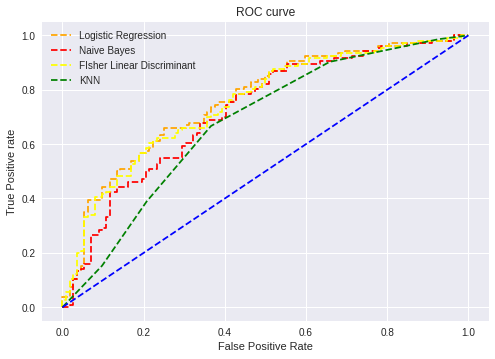

In [26]:
#Fitting K-NN classifier to the training set
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)
#importing model from sklearn 
    
    #predict class
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_curve

    # roc curve for models
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

    # matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='FIsher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [27]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1])

In [28]:
#Creating the Confusion matrix
cm= confusion_matrix(y_test, y_pred)

In [29]:
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)

In [30]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 64.94%
The Confusion Matrix is:
  [[52 30]
 [24 48]]
                precision    recall  f1-score   support

Covid Negative       0.68      0.63      0.66        82
Covid Positive       0.62      0.67      0.64        72

      accuracy                           0.65       154
     macro avg       0.65      0.65      0.65       154
  weighted avg       0.65      0.65      0.65       154

